# <font color='navy'> Effective Spread

<font color='navy'> Luis Márquez

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('aapl_5m_train.csv')
df.drop(columns=['Volume', 'Unnamed: 0', 'Timestamp', 'Gmtoffset'], inplace=True)
df['Diff'] = df['Close'].diff()
df['Diff_Lag'] = df['Diff'].shift(1)
df = df.dropna().reset_index(drop=True)

s = $2 \sqrt{cov}$

## <font color='navy'> Block Method

## <font color='navy'> Serial Covariance

In [3]:
windows = [5, 10, 20, 50, 100]

df['Operation_Type'] = np.where(df['Diff'] > 0, 'Ask', 'Bid')

for window in windows:
    df[f'Cov_{window}'] = np.abs(df['Diff'].rolling(window=window).cov(df['Diff_Lag']))
    df[f'Spread_{window}'] = 2 * np.sqrt(df[f'Cov_{window}'])

df.tail()

,Datetime,Open,High,Low,Close,Diff,Diff_Lag,Operation_Type,Cov_5,Spread_5,Cov_10,Spread_10,Cov_20,Spread_20,Cov_50,Spread_50,Cov_100,Spread_100
39564,2022-12-30 20:40:00,129.029998,129.130004,128.919998,129.054992,0.014999,0.019989,Ask,0.002153,0.092807,0.007281,0.170663,0.002021,0.089920,0.001597,0.079913,0.004417,0.132918
39565,2022-12-30 20:45:00,129.059997,129.399993,129.020004,129.380004,0.325012,0.014999,Ask,0.002983,0.109240,0.008514,0.184538,0.003648,0.120792,0.001944,0.088185,0.004450,0.133413
39566,2022-12-30 20:50:00,129.375000,129.929992,129.330001,129.764404,0.384400,0.325012,Ask,0.013455,0.231993,0.001375,0.074165,0.000684,0.052312,0.000681,0.052211,0.005782,0.152079
39567,2022-12-30 20:55:00,129.764999,129.949996,129.619995,129.949996,0.185592,0.384400,Ask,0.011183,0.211500,0.005165,0.143741,0.002100,0.091643,0.001991,0.089236,0.006512,0.161393
39568,2022-12-30 21:00:00,129.929992,129.929992,129.929992,129.929992,-0.020004,0.185592,Bid,0.008050,0.179443,0.005374,0.146617,0.000918,0.060612,0.001816,0.085220,0.006523,0.161527


In [4]:
bid_ask_df = pd.DataFrame()

for i in range(len(windows)):
    bid_ask_df[f'Bid_{windows[i]}'] = np.where(df['Diff'] > 0, df['Close'] - df[f'Spread_{windows[i]}'], df['Close'])
    bid_ask_df[f'Ask_{windows[i]}'] = np.where(df['Diff'] > 0, df['Close'], df['Close'] + df[f'Spread_{windows[i]}'])

bid_ask_df

,Bid_5,Ask_5,Bid_10,Ask_10,Bid_20,Ask_20,Bid_50,Ask_50,Bid_100,Ask_100
0,NaN,132.059997,NaN,132.059997,NaN,132.059997,NaN,132.059997,NaN,132.059997
1,NaN,132.250000,NaN,132.250000,NaN,132.250000,NaN,132.250000,NaN,132.250000
2,131.589996,NaN,131.589996,NaN,131.589996,NaN,131.589996,NaN,131.589996,NaN
3,131.448898,NaN,131.448898,NaN,131.448898,NaN,131.448898,NaN,131.448898,NaN
4,131.119995,131.685307,131.119995,NaN,131.119995,NaN,131.119995,NaN,131.119995,NaN
...,...,...,...,...,...,...,...,...,...,...
39564,128.962185,129.054992,128.884329,129.054992,128.965072,129.054992,128.975079,129.054992,128.922074,129.054992
39565,129.270764,129.380004,129.195466,129.380004,129.259212,129.380004,129.291819,129.380004,129.246591,129.380004
39566,129.532411,129.764404,129.690239,129.764404,129.712092,129.764404,129.712193,129.764404,129.612325,129.764404
39567,129.738496,129.949996,129.806255,129.949996,129.858353,129.949996,129.860760,129.949996,129.788603,129.949996


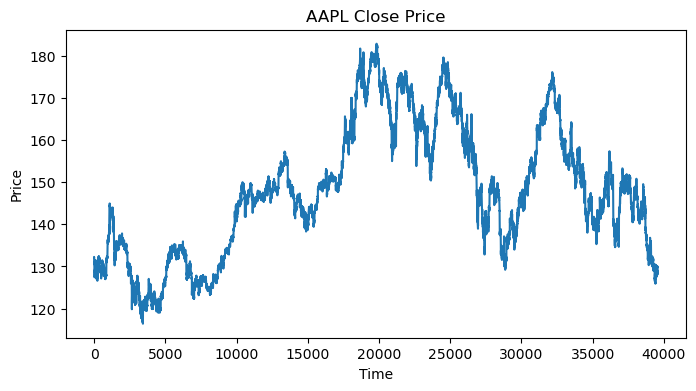

In [5]:
plt.figure(figsize=(8, 4))
plt.plot(df['Close'])
plt.title('AAPL Close Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

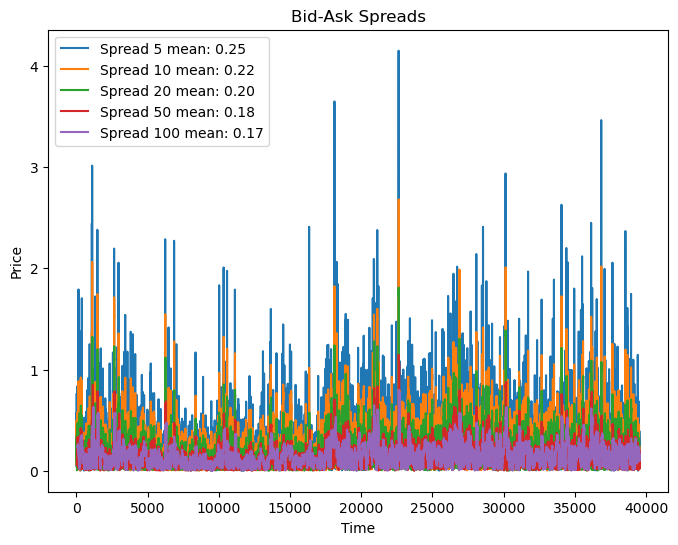

In [6]:
spreads = [df[f'Spread_{w}'] for w in windows]
plt.figure(figsize=(8, 6))
for i, spread in enumerate(spreads):
    plt.plot(spread, label=f'Spread {windows[i]} mean: {spread.mean():.2f}')
plt.title('Bid-Ask Spreads')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()